In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import TomekLinks

In [106]:
dataset = pd.read_csv('adult.csv')
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


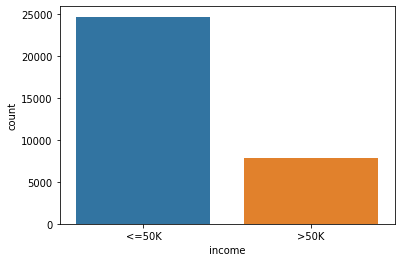

In [107]:
sns.countplot(x='income',data=dataset);

In [108]:
dataset.iloc[:,:-1] = dataset.iloc[:,:-1].apply(LabelEncoder().fit_transform)

In [109]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,72,0,2649,11,8,6,0,1,4,0,0,91,39,39,<=50K
1,65,4,6514,11,8,6,4,1,4,0,0,91,17,39,<=50K
2,49,0,11175,15,9,6,0,4,2,0,0,91,39,39,<=50K
3,37,4,7009,5,3,0,7,4,4,0,0,90,39,39,<=50K
4,24,4,16850,15,9,5,10,3,4,0,0,90,39,39,<=50K


In [110]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [111]:
X.shape,y.shape

((32561, 14), (32561,))

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, stratify=y)

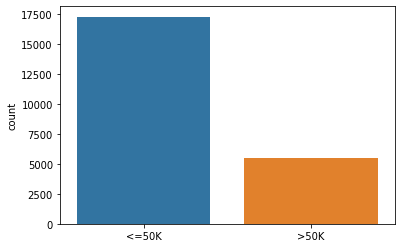

In [113]:
sns.countplot(x=y_train);

In [114]:
naives = GaussianNB()
naives.fit(X_train,y_train)
previsores = naives.predict(X_test)

In [115]:
acuracia = accuracy_score(y_test,previsores)
print(f'Acuracy: {acuracia * 100}%')

Acuracy: 81.63578667212612%


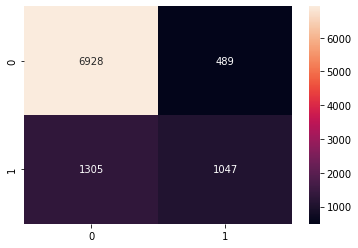

In [116]:
matrix_confusao = confusion_matrix(y_test,previsores)
sns.heatmap(matrix_confusao,annot=True,fmt='d');

Subamostragem (Tomek links)

In [117]:
tl = TomekLinks(sampling_strategy='majority')
X_under,y_under = tl.fit_resample(X,y)
X_under.shape,y_under.shape

((30475, 14), (30475,))

In [118]:
X_train_u,X_test_u,y_train_u,y_test_u = train_test_split(X_under,y_under, test_size=0.3, stratify=y_under)

In [119]:
navies_u = GaussianNB()
navies_u.fit(X_train_u,y_train_u)
previsores_u = navies_u.predict(X_test_u)
accuracy_score(y_test_u,previsores_u)

0.8205184293995407

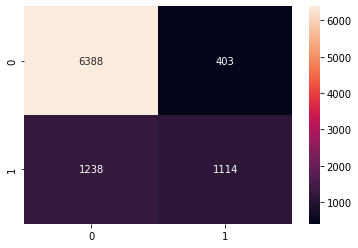

In [120]:
matrix_confusao_u = confusion_matrix(y_test_u,previsores_u)
sns.heatmap(matrix_confusao_u,annot=True,fmt='d');